In [34]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

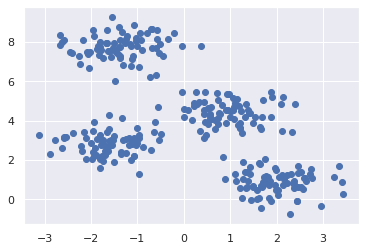

In [35]:
# manually generate dataset
# use the make_blobs() function with n_samples=300,centers=4,cluster_std=0.6 and random_state=0
# store the return value to X and y_true
X, y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
# plot the dataset using plt.scatter()
plt.scatter(X[:,0],X[:,1])

In [36]:
# use sklearn api to visualize the clustering result.

# first create the Kmeans obejct 
k_means = KMeans(n_clusters=4)
# then fit the data
k_means.fit(X)
# finally, make prediction
pred_k_means = k_means.predict(X)
# print(pred_k_means)

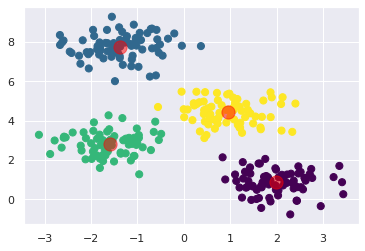

In [37]:
# visualize the clustering result

# using the plt.scatter() with x=input data, y=data label, s=50 and set colormap to viridis
plt.scatter(X[:,0],X[:,1],c=pred_k_means,s=50,cmap='viridis')

# sotre the centers to a variable using kmeans.cluster_centers_
centers = k_means.cluster_centers_
# plot the center points using the plt.scatter()
plt.scatter(centers[:,0],centers[:,1],c='red',s=175,alpha=0.5) 


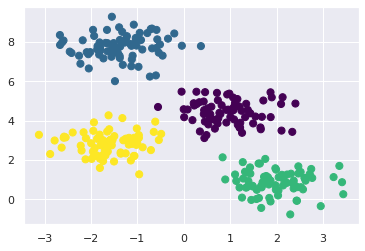

In [38]:
def find_clusters(X, n_clusters, rseed=2,centers=np.array([])):

    # 1. Randomly choose clusters
#     using np.random.RandomState first to set the seed and store it to a variable r
    r = np.random.RandomState(rseed)
#     using r.permutation(data shape) to choose first k data point index as initial center.
    idx = r.permutation(X.shape[0])[:n_clusters]
#     store the center to a list.
    centers = X[idx]
#     repeat until convergence:
    while(True):
#         Assign labels based on closest center using pairwise_distances_argmin()
      labels = pairwise_distances_argmin(X,centers)
#         Find new centers from means of points:
      new_centers_from_means_of_points = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
#         Update centroid of each cluster to be the average(mean) of examples assigned to cluster k
#         check for convergence:
      if np.all(centers == new_centers_from_means_of_points):
        break
      
#        convergence if old center is new center
      centers = new_centers_from_means_of_points

#     return the centers and labels
    return centers, labels




# fit our function to the data set with the starting point rseed=2.
centers, labels = find_clusters(X,4)
# plot the figures
plt.scatter(X[:,0],X[:,1],c=labels, s=50,cmap='viridis')

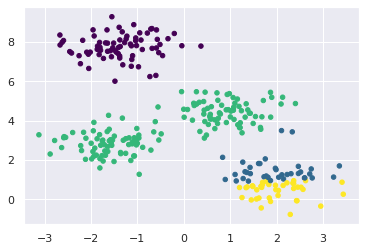

In [39]:
# fit our function to the data set with the starting point rseed=0.
centers, labels = find_clusters(X, 4, rseed=0)
# plot the figure
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis');

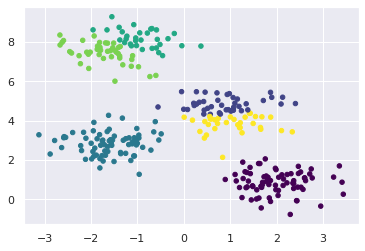

In [40]:
# fit our function to the data set with the starting point rseed=2 k=6.
labels = KMeans(6, random_state=0).fit_predict(X)
# plot the figure
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis');

In [41]:
def eucl_dist(a, b, axis=1):
#     def the function that calculate the l2 distance
    return np.sqrt(np.sum((a-b)**2))

# def the init function for kmean++:
# 
def init_center(k,X,rseed):
#     create a empty list store centers

#     random choose a center:
      # random choose a index:
      # using np.random.RandomState first to set the seed and store it to a variable r
      # using r.permutation(data shape) to choose first data point index as initial center.
#     append this center to the center list
    r = np.random.RandomState(rseed)

    idx = r.permutation(X.shape[0])[0]
    centers = [X[idx]]
#     while the length of the list less than k:
    for j in range(1,k):
#         calculate dj for all data point: dj=min(||x^j-c_k||) whiere dj store the distance to the cloest center
        dj = np.array([np.min([eucl_dist(xj,c) for c in centers]) for xj in X])
#         calculate pj: pj=dj^2/sum_all(d^2) for all data point
        pj = np.cumsum((np.square(dj))/(np.sum(np.square(dj))))
#         random choose j using the probability:
#             using np.random.choice()
        r = np.random.choice(pj)
        idx = 0
        for j, p in enumerate(pj):
          if r < p:
            i = j
            break

#         set the new center to be x^j
#         append the new center to center list
        centers.append(X[idx])
#     return all centers
        all_centers = np.array(centers)
    return all_centers


In [42]:
# def the kmean++:
def kmpp(X, n_clusters,rseed):
#     first init centers
    all_centers = init_center(4,X,rseed) 
    centers, labels = find_clusters(X,n_clusters,rseed,centers=all_centers)
    return centers, labels
      
#     then, run the k-means with the initialized centers.

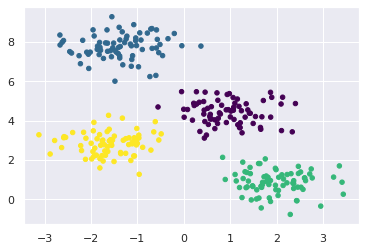

In [43]:
# fit our kmean++ function to the data set with rseed=2.
centers, labels = kmpp(X,4,2)
# plot the figure
plt.scatter(X[:,0],X[:,1],c=labels,s=20,cmap='viridis')

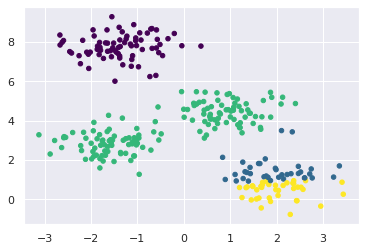

In [44]:
# fit our kmean++ function to the data set with rseed=0.
centers, labels = kmpp(X,4,0)
# plot the figure
plt.scatter(X[:,0],X[:,1],c=labels,s=20,cmap='viridis')